Joshua Jacob Titanic - Who Will Survive?

- Project Overview
The Titanic disaster of April 15, 1912 claimed over 1,500 lives out of the 2,224 onboard.  
In this project, we’ll use passenger data to explore which factors most influenced survival whether if it was it luck, status, family size, or another variable.

What I have to do for this project:

EDA:
Get familiar with the dataset and decide what features and observations will be useful. Make
good use of visualizations. Specific tasks may include but are not limited to:
● Clean the dataset, remove the outliers, before any data analysis. Explain what you did.
● Explore the socio-economic status of the passenger, is there any relationship between
socio-economic status with other features, such as age, gender, number of family members
on board, etc.
● Explore the distribution of survival victims in relation to age, gender, socioeconomic
class, etc.
● What features seem to be the most important ones? Perform a correlation analysis
before your prediction task.
● How can you extract information from the non-numerical features?


Modeling and Question Answering:
- Build three models, train them on the training set, and predict the outcome on the test set (after dropping the survival column in the test set). 
- Explain how each model works (briefly introduce the machine learning algorithms behind them).
- Evaluate the performance of each model based on the original outcome in the test set. If your predictions are not so accurate, what do you think is the reason?
- Use other evaluation metrics to evaluate your models (Precision, Recall, Fscore). Split the data further to include a cross validation set. Did this improve your model’s performance on the test set?

In [76]:
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

# check the train data to make sure I uploaded it properly and check for any null values
display(train.info())
display(train.describe())

# check the test data to make sure I uploaded it properly and check for any null values
display(test.info())
display(test.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


I Started off by importing pandas and loading the training and test datasets into my local Jupyter notebook. I ran info() and describe() to take a quick look at the data and flag anything that needs cleaning or outlier removal.

- Training Data
I noticed that the Cabin column has only 204 non-null values out of 889, so I’ll drop it entirely to avoid dealing with excessive missingness. The Age column has 714 non-null entries, so I plan to fill the missing ages with the overall mean to preserve as much data as possible. I also noticed that the embarked column has 2 null values so I will input the most common embarked location into those boxes.

- Testing Data
I noticed that the Cabin column has only 91 non-null values out of 418, so I’ll drop it entirely to avoid dealing with excessive missingness. The Age column has 332 non-null entries, so I plan to fill the missing ages with the overall mean to preserve as much data as possible. I found a single missing value in the fare column. Instead of using a global average, I’ll impute it by grouping passengers by Pclass and Embarked, and then get the mean fare for each group and then fill the missing entrys with that.

In [102]:
import pandas as pd

# Get the mean for age, the mode for port and then get the average ticket price for each combo of pclass and embarked
ageMean = train['Age'].mean()
embarkedMode = train['Embarked'].mode()
groups = train.groupby(['Pclass', 'Embarked'])['Fare'].mean()

# drop cabin because as I mentioned earlier there are too many missing values
train = train.drop(columns='Cabin', errors='ignore')
test = test.drop(columns='Cabin', errors='ignore')

# fill in the missing values
train['Age'] = train['Age'].fillna(ageMean)
train['Embarked'] = train['Embarked'].fillna(embarkedMode)
test['Age'] = test['Age'].fillna(ageMean)

# put in the missing fare cost
def getFare(row):
    if pd.isnull(row['Fare']):
        groupsMean = test.groupby(['Pclass','Embarked'])['Fare'].transform('mean')
        test['Fare'] = test['Fare'].fillna(groupsMean)
    return row['Fare']

test['Fare'] = test.apply(getFare, axis=1)

# check to see if there are any null values left over
print("Train:\n", train[['Age','Embarked']].isnull().sum())
print("Test:\n", test [['Age','Fare']].isnull().sum())

Train:
 Age         0
Embarked    0
dtype: int64
Test:
 Age     0
Fare    0
dtype: int64


From the results we can see that age, embarked, and fare no longer contain nulls in the training and test sets. 

The next step is to identify any outlier. The dataset isn't too big so I am going to search through the data set visually. In order to make sure I didn't miss anything I can look for the top 10 and bottom 10 for the age, fare, sibsp, and parch categories. 

In [100]:
columns = ['Age', 'Fare', 'SibSp', 'Parch']

for col in columns:
    print(f"\n {col} ")
    print("Top 10:")
    display(train[['PassengerId','Pclass','Embarked','Survived', col]].nlargest(10, col))
    print("Bottom 10:")
    display(train[['PassengerId','Pclass','Embarked','Survived', col]].nsmallest(10, col))


 Age 
Top 10:


,PassengerId,Pclass,Embarked,Survived,Age
630,631,1,S,1,80.0
851,852,3,S,0,74.0
96,97,1,C,0,71.0
493,494,1,C,0,71.0
116,117,3,Q,0,70.5
672,673,2,S,0,70.0
745,746,1,S,0,70.0
33,34,2,S,0,66.0
54,55,1,C,0,65.0
280,281,3,Q,0,65.0


Bottom 10:


,PassengerId,Pclass,Embarked,Survived,Age
803,804,3,C,1,0.42
755,756,2,S,1,0.67
469,470,3,C,1,0.75
644,645,3,C,1,0.75
78,79,2,S,1,0.83
831,832,2,S,1,0.83
305,306,1,S,1,0.92
164,165,3,S,0,1.00
172,173,3,S,1,1.00
183,184,2,S,1,1.00



 Fare 
Top 10:


,PassengerId,Pclass,Embarked,Survived,Fare
258,259,1,C,1,512.3292
679,680,1,C,1,512.3292
737,738,1,C,1,512.3292
27,28,1,S,0,263.0000
88,89,1,S,1,263.0000
341,342,1,S,1,263.0000
438,439,1,S,0,263.0000
311,312,1,C,1,262.3750
742,743,1,C,1,262.3750
118,119,1,C,0,247.5208


Bottom 10:


,PassengerId,Pclass,Embarked,Survived,Fare
179,180,3,S,0,0.0
263,264,1,S,0,0.0
271,272,3,S,1,0.0
277,278,2,S,0,0.0
302,303,3,S,0,0.0
413,414,2,S,0,0.0
466,467,2,S,0,0.0
481,482,2,S,0,0.0
597,598,3,S,0,0.0
633,634,1,S,0,0.0



 SibSp 
Top 10:


,PassengerId,Pclass,Embarked,Survived,SibSp
159,160,3,S,0,8
180,181,3,S,0,8
201,202,3,S,0,8
324,325,3,S,0,8
792,793,3,S,0,8
846,847,3,S,0,8
863,864,3,S,0,8
59,60,3,S,0,5
71,72,3,S,0,5
386,387,3,S,0,5


Bottom 10:


,PassengerId,Pclass,Embarked,Survived,SibSp
2,3,3,S,1,0
4,5,3,S,0,0
5,6,3,Q,0,0
6,7,1,S,0,0
8,9,3,S,1,0
11,12,1,S,1,0
12,13,3,S,0,0
14,15,3,S,0,0
15,16,2,S,1,0
17,18,2,S,1,0



 Parch 
Top 10:


,PassengerId,Pclass,Embarked,Survived,Parch
678,679,3,S,0,6
13,14,3,S,0,5
25,26,3,S,1,5
610,611,3,S,0,5
638,639,3,S,0,5
885,886,3,Q,0,5
167,168,3,S,0,4
360,361,3,S,0,4
438,439,1,S,0,4
567,568,3,S,0,4


Bottom 10:


,PassengerId,Pclass,Embarked,Survived,Parch
0,1,3,S,0,0
1,2,1,C,1,0
2,3,3,S,1,0
3,4,1,S,1,0
4,5,3,S,0,0
5,6,3,Q,0,0
6,7,1,S,0,0
9,10,2,C,1,0
11,12,1,S,1,0
12,13,3,S,0,0


There is nothing out of the ordinary in the data set and all the numbers make sense. The high fare prices make sense because the people that are paying the most all are in Pclass 1 and embarked from Cherbourg. The lowest fare price being 0 can be people that are grouped into a family ticket cost (someone elses fair price is higher while theres is 0) or they could be a cabin member or worker. For sigSp and Parch none of the numbers are out of the ordinary.   

This means that I am done cleaning the data so I can move foward. 

Next thing I want to do is I want to see how different factors affect survival rate like pclass, gender, and place that they embarked.

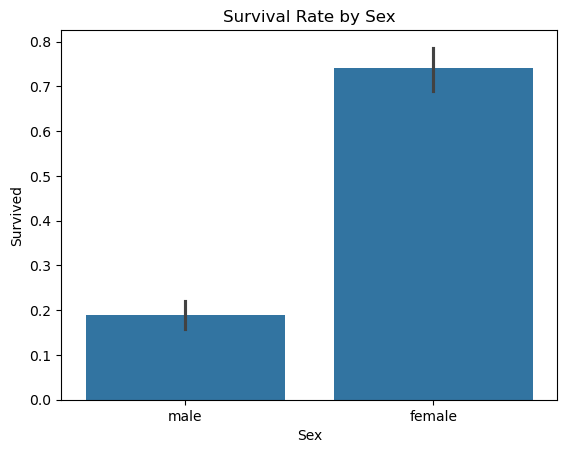

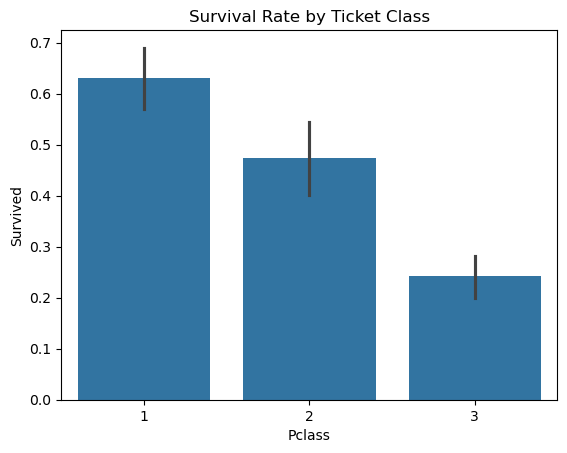

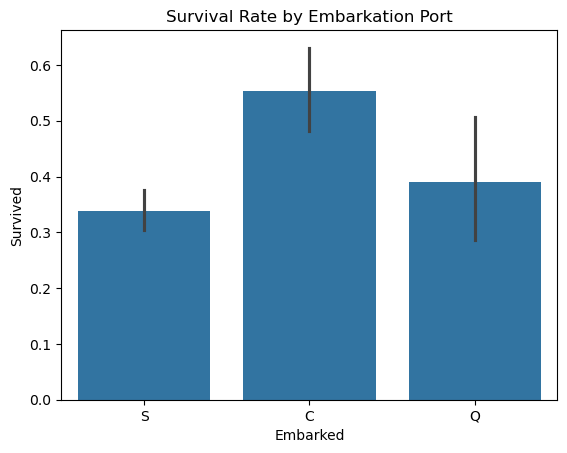

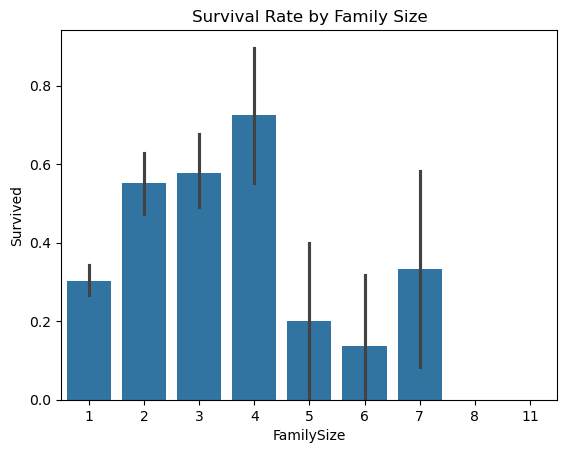

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# gender survival rate
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

# pclass survival rate
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Ticket Class')
plt.show()

# embarked survival rate
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarkation Port')
plt.show()

# family size survival rate
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test ['FamilySize'] = test ['SibSp'] + test ['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title('Survival Rate by Family Size')
plt.show()

In these graphs you can see the differences in survival rates based on different factors such as sex, ticket class and embarkation point.

Looking at the first graph we can see the huge difference survival rate between male and female with more than a 50% survival rate difference. This makes sense because the saying is to get women and children out first usually. Survival rate by ticket class shows us that there was definitely more priority for class 1 and then class 2. In first class they had the best odds, around 62%,to make it out alive while those in second class survived about 48 % of the time, and third‑class travelers only about 24 %. Survival rate by Embarkation point shows us that those that embarked at Cherbourg had the highest surival rate. Cherbourg passengers was around 55%, followed by Queenstown (39%) and Southampton (~34 %). Also by combining sigsp and parch you can see how family size affected the survival rate and it looks like a family size of 4 had the highest survival rate at around 73%. Altogether, ticket class, gender, and embarkation port emerge as the strongest predictors of who lived through the disaster.



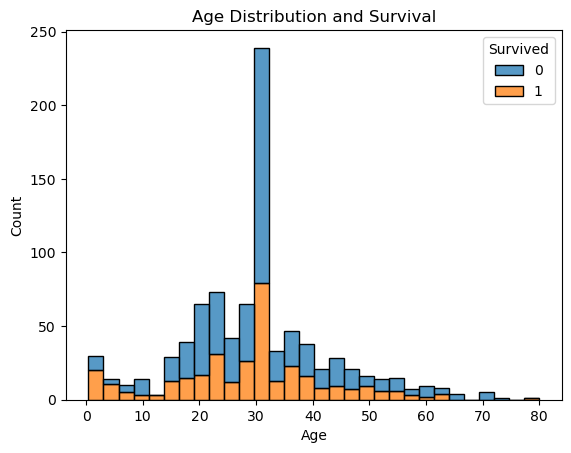

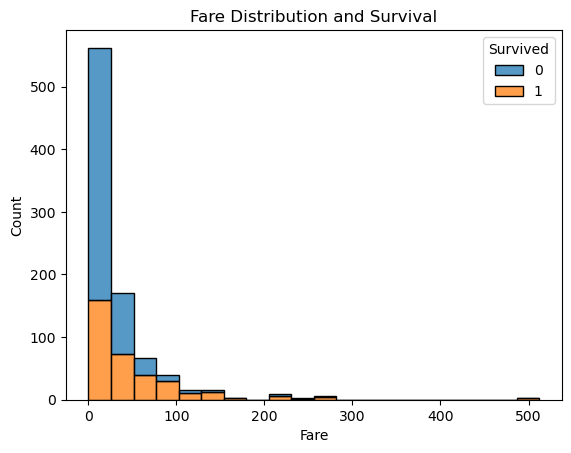

In [123]:
# age surivival distribution
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution and Survival')
plt.show()

# fare survival distribution
sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=20)
plt.title('Fare Distribution and Survival')
plt.show()

The stacked histograms show that most passengers were aged 20 to 40, where survival rates were relatively low, while children under 10 and the elderly had noticeably higher survival. For fares, tickets under 100 saw many fatalities. Survival odds steadily improved as fare increased and most of the expensive tickets survived.

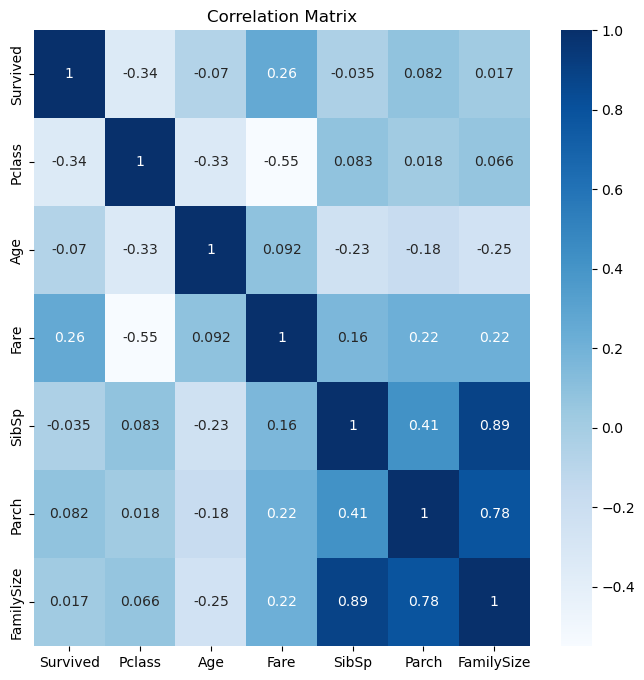

In [209]:
correlationColumns = ['Survived','Pclass','Age','Fare','SibSp','Parch','FamilySize']
matrix = train[correlationColumns].corr()

plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix makes it clear that survived and fare (+0.26) are the strongest linear predictors of survival: wealthier, first‑class passengers lived at much higher rates. Family‐size variables (SibSp, Parch, FamilySize) correlate tightly with each other. Pclass and fare have a strong negative correlation because the the first has the highest fare cost. 

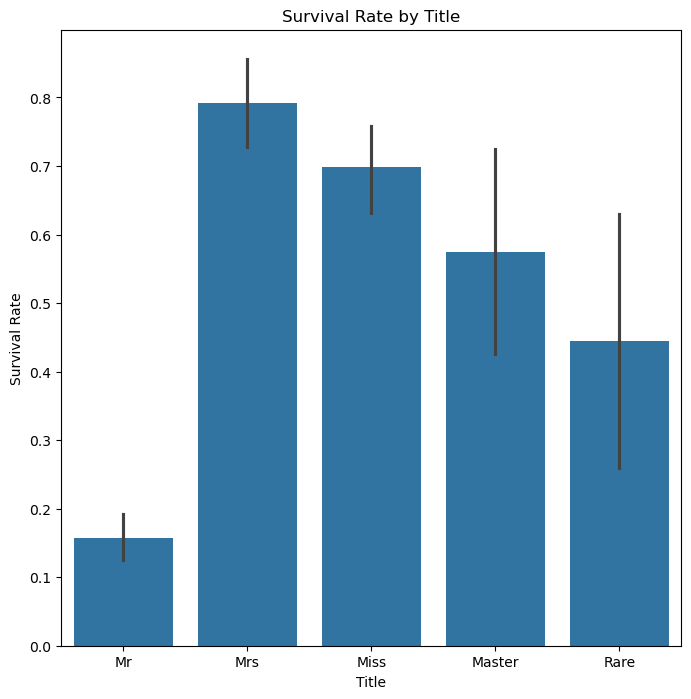

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the titles
for data in [train, test]:
   data['Title'] = (data['Name'].str.split(', ').str[1].str.split('.').str[0])

# handle the rare titles
titleCounts = train['Title'].value_counts()
rare = titleCounts[titleCounts < 15].index
train['Title'] = train['Title'].replace(rare, 'Rare')
test['Title']  = test['Title'].replace(rare, 'Rare')

plt.figure(figsize=(8,8))
order = train.groupby('Title')['Survived'].mean().sort_values().index
sns.barplot(x ='Title', y ='Survived', data = train)
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Title')
plt.show()

Mrs and Miss have the highest survival rate which makes sense because earlier we showed that females had a higher survival rate than males. Mr has a really low survival around 17%.

Master is a title for young boys so the high survival rate makes sense because women and children come first. 

Rare is all the uncommon titles grouped together and it sits in the middle around 45%. This groups together priests and other religious officials, military and so much more. If the title had less than 15 appearences, I grouped it into rare.


In [233]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test ['FamilySize'] = test ['SibSp'] + test ['Parch'] + 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1,'IsAlone'] = 1
test ['IsAlone'] = 0
test.loc[test['FamilySize'] == 1,'IsAlone'] = 1


columns = ['Pclass','Age','Fare','SibSp','Parch','FamilySize','IsAlone','Sex','Embarked','Title']
X = pd.get_dummies(train[columns], drop_first=True)
y = train['Survived']
trainX, valueX, trainY, valueY = train_test_split(X, y, test_size=0.2)

# logistic Regression
logModel = LogisticRegression(max_iter=1200)
logModel.fit(trainX, trainY)
logPredictions = logModel.predict(valueX)

print("Logistic Regression on validation set")
print("Accuracy:", accuracy_score(valueY, logPredictions))
print("Precision:", precision_score(valueY, logPredictions))
print("Recall:", recall_score(valueY, logPredictions))
print("F1-score:", f1_score(valueY, logPredictions))
print()



# linear Regression 
linModel = LinearRegression()
linModel.fit(trainX, trainY)
lin = linModel.predict(valueX)


linPredictions = []
for predictedValue in lin:
    if predictedValue < 0.5:
        linPredictions.append(0)
    else:
        linPredictions.append(1)

print("Linear Regression on validation set")
print("Accuracy:", accuracy_score(valueY, linPredictions))
print("Precision:", precision_score(valueY,linPredictions))
print("Recall:", recall_score(valueY, linPredictions))
print("F1-score:", f1_score(valueY, linPredictions))
print()



# k nearest neighbors
knnModel = KNeighborsClassifier(n_neighbors = 6)
knnModel.fit(trainX, trainY)
knnPredictions = knnModel.predict(valueX)

print("KNN on validation set")
print("Accuracy:", accuracy_score(valueY, knnPredictions))
print("Precision:", precision_score(valueY, knnPredictions))
print("Recall:", recall_score(valueY, knnPredictions))
print("F1-score:", f1_score(valueY, knnPredictions))
print()



kf = KFold(n_splits=5, shuffle=True, random_state=42)


logScores = []
linScores = []
knnScores = []


for trainIdx, testIdx in kf.split(X):
    XTrain, XTest = X.iloc[trainIdx], X.iloc[testIdx]
    yTrain, yTest = y.iloc[trainIdx], y.iloc[testIdx]
    
    lrModel = LogisticRegression(max_iter=1000)
    lrModel.fit(XTrain, yTrain)
    
    preds = lrModel.predict(XTest)
    logScores.append(accuracy_score(yTest, preds))

print("Logistic CV accuracy:", np.mean(logScores), "+-", np.std(logScores))



for trainIdx, testIdx in kf.split(X):
    XTrain, XTest = X.iloc[trainIdx], X.iloc[testIdx]
    yTrain, yTest = y.iloc[trainIdx], y.iloc[testIdx]
    
    linModel = LinearRegression()
    linModel.fit(XTrain, yTrain)
    
    continuousPreds = linModel.predict(XTest)
    binaryPreds = [1 if val >= 0.5 else 0 for val in continuousPreds]
    linScores.append(accuracy_score(yTest, binaryPreds))

print("Linear CV accuracy:", np.mean(linScores), "+-", np.std(linScores))



for trainIdx, testIdx in kf.split(X):
    XTrain = X.iloc[trainIdx] 
    XTest = X.iloc[testIdx]
    yTrain = y.iloc[trainIdx]
    yTest = y.iloc[testIdx]
    
    knnModel = KNeighborsClassifier(n_neighbors=5)
    knnModel.fit(XTrain, yTrain)
    
    preds = knnModel.predict(XTest)
    knnScores.append(accuracy_score(yTest, preds))

print("KNN CV accuracy:", np.mean(knnScores), "+-", np.std(knnScores))


Logistic Regression on validation set
Accuracy: 0.8491620111731844
Precision: 0.7777777777777778
Recall: 0.835820895522388
F1-score: 0.8057553956834532

Linear Regression on validation set
Accuracy: 0.8547486033519553
Precision: 0.7971014492753623
Recall: 0.8208955223880597
F1-score: 0.8088235294117647

KNN on validation set
Accuracy: 0.7486033519553073
Precision: 0.6896551724137931
Recall: 0.5970149253731343
F1-score: 0.64

Logistic CV accuracy: 0.8249387985688281 +- 0.02401244158067157
Linear CV accuracy: 0.8305442219571905 +- 0.02098971257269628
KNN CV accuracy: 0.7115623626890967 +- 0.009030419683015888


Logistic Regression: a binary classifier that estimates each passenger’s survival probability using a weighted sum of features passed through a logistic function.

Linear Regression: a regression model that predicts a continuous survival score and then classifies passengers as survivors if that score exceeds 0.5.

K‑Nearest Neighbors: a method that predicts survival by looking at the six most similar passengers in the dataset and taking a majority vote.

Results:

Logistic Regression achieved 84.9 % accuracy, with 77.8 % precision and 83.6 % recall with a f1 score of  0.80.

Linear Regression did better with a 85.5 % accuracy, a 79.7 % precision, 82.1 % recall, and a f1 score of 0.80.

K nearest neighbors did not do good at a 74.9 % accuracy with a 69 % precision, 59.7 % recall, and a f1 score of .64.



Then I ran 5‑fold cross‑validation on the full training set to get more  estimates:

Logistic Regression: 82.5 % +- 2.4 %

Linear Regression: 83.1 % +- 2.1 %

K‑NN: 71.2 % +- 0.9 %

Notice that both Logistic and Linear models drop by about 2 points under CV from 84.9 → 82.5 % and from 85.5 → 83.1 %. K‑NN falls from 74.9 % to 71.2 %, which shows its sensitivity to which neighbors end up in each fold.

Reason for Underperforming:

Linear Regression looked great on that single split but didn’t hold up when we tested more broadly, suggesting it was fitting to that specific subset. K‑Nearest Neighbors jumped around because its “nearest neighbor” logic is very sensitive to how you measure distances—small changes in scaling or feature choice can swing its performance. Logistic Regressionstayed the most consistent. Its drop from hold‑out to cross‑validation was alright, which means it’s capturing the main trends without over‑tuning to one particular slice of data.
